# IMPORTING LIBRARIES

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [55]:
df=pd.read_csv('project12.csv')
# i can take help from 2,5, appdata complete

# Data overview

In [40]:
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,7802,34,housemaid,married,primary,no,87,yes,no,unknown,15,may,139,2,-1,0,unknown,no
1,8187,47,management,married,secondary,no,623,yes,no,cellular,13,may,102,6,-1,0,unknown,no
2,4806,34,services,single,tertiary,no,3119,no,no,cellular,16,oct,306,1,-1,0,unknown,yes
3,5055,25,blue-collar,single,secondary,no,1857,yes,no,cellular,12,oct,187,1,91,12,success,yes
4,6144,50,management,married,tertiary,no,11528,yes,no,unknown,30,may,57,1,-1,0,unknown,no
5,10342,58,retired,married,primary,no,5092,no,no,unknown,11,jun,199,6,-1,0,unknown,no
6,9558,32,management,married,tertiary,no,62,yes,no,telephone,13,nov,45,1,-1,0,unknown,no
7,11040,50,services,married,secondary,no,77,no,no,cellular,27,may,138,2,-1,0,unknown,no
8,10931,58,admin.,married,primary,no,879,yes,no,unknown,16,may,242,7,-1,0,unknown,no
9,9181,33,technician,divorced,secondary,no,370,yes,no,cellular,11,aug,145,4,-1,0,unknown,no


In [41]:
df.shape

(10000, 18)

In [42]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5572.117900,41.276800,1538.750000,15.676400,371.714600,2.497900,51.499800,0.837000
std,3214.017246,11.938234,3273.840895,8.418371,346.135046,2.719069,109.276137,2.324128
min,0.000000,18.000000,-2712.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,2779.750000,32.000000,125.000000,8.000000,139.000000,1.000000,-1.000000,0.000000
50%,5575.500000,39.000000,554.500000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,8348.250000,49.000000,1720.000000,22.000000,495.000000,3.000000,15.500000,1.000000
max,11161.000000,93.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
ID           10000 non-null int64
age          10000 non-null int64
job          10000 non-null object
marital      10000 non-null object
education    10000 non-null object
default      10000 non-null object
balance      10000 non-null int64
housing      10000 non-null object
loan         10000 non-null object
contact      10000 non-null object
day          10000 non-null int64
month        10000 non-null object
duration     10000 non-null int64
campaign     10000 non-null int64
pdays        10000 non-null int64
previous     10000 non-null int64
poutcome     10000 non-null object
deposit      10000 non-null object
dtypes: int64(8), object(10)
memory usage: 1.4+ MB


In [44]:
df.isnull().sum(axis=0)

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Data cleaning

In [56]:
df=df.drop(["ID","previous","poutcome"],axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,deposit
0,34,housemaid,married,primary,no,87,yes,no,unknown,15,may,139,2,-1,no
1,47,management,married,secondary,no,623,yes,no,cellular,13,may,102,6,-1,no
2,34,services,single,tertiary,no,3119,no,no,cellular,16,oct,306,1,-1,yes
3,25,blue-collar,single,secondary,no,1857,yes,no,cellular,12,oct,187,1,91,yes
4,50,management,married,tertiary,no,11528,yes,no,unknown,30,may,57,1,-1,no


# Exploratory data analysis

In [9]:
df['job'].value_counts()

management       2305
blue-collar      1738
technician       1618
admin.           1197
services          812
retired           715
self-employed     364
student           326
unemployed        325
entrepreneur      291
housemaid         249
unknown            60
Name: job, dtype: int64

In [9]:
df['marital'].value_counts()

married     5699
single      3147
divorced    1154
Name: marital, dtype: int64

In [10]:
df['education'].value_counts()

secondary    4885
tertiary     3327
primary      1352
unknown       436
Name: education, dtype: int64

In [11]:
df['contact'].value_counts()

cellular     7213
unknown      2088
telephone     699
Name: contact, dtype: int64

In [12]:
df['loan'].value_counts()

no     8692
yes    1308
Name: loan, dtype: int64

In [13]:
df['deposit'].value_counts()

no     5252
yes    4748
Name: deposit, dtype: int64

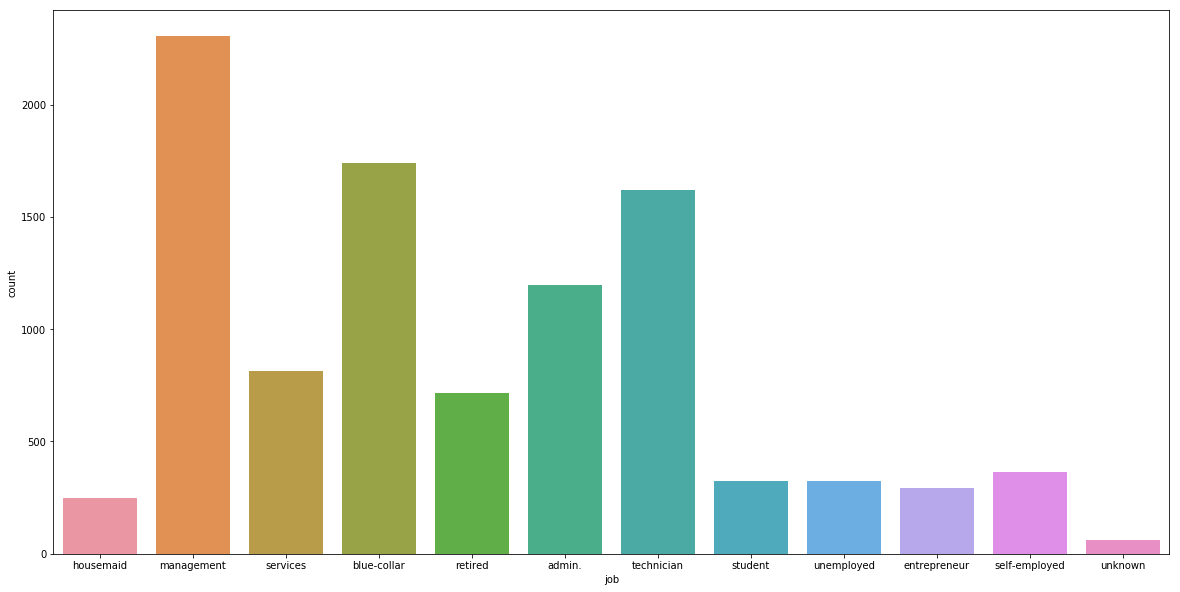

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x='job',data=df)
plt.show()

<Figure size 1080x1080 with 0 Axes>

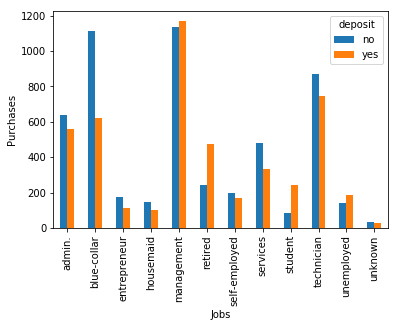

In [15]:
plt.figure(figsize=(15,15))
pd.crosstab(df.job, df.deposit).plot(kind='bar')
plt.xlabel('Jobs')
plt.ylabel('Purchases')
plt.show()

Text(0, 0.5, 'Frequency')

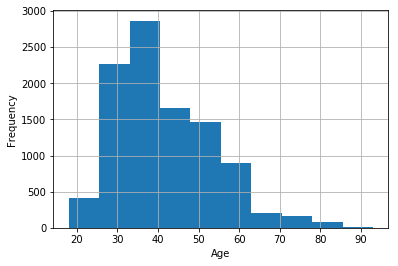

In [16]:
#plt.figure(figsize=(10,10))
df.age.hist()
plt.xlabel('Age')
plt.ylabel('Frequency')

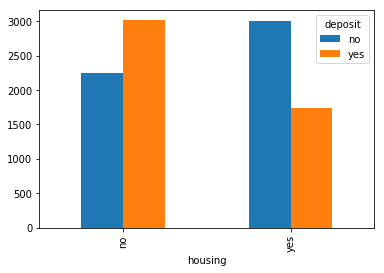

In [17]:
pd.crosstab(df.housing,df.deposit).plot(kind='bar')

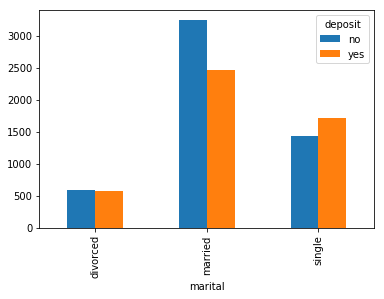

In [18]:
pd.crosstab(df.marital,df.deposit).plot(kind='bar')

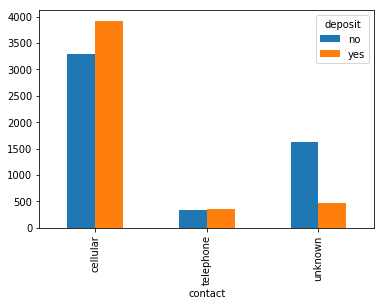

In [19]:
pd.crosstab(df.contact,df.deposit).plot(kind='bar')

In [10]:
# Set Background
sns.set(style = 'white', font_scale =2)
# Compute the matrix
corr = df.corr()
# Generate the mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

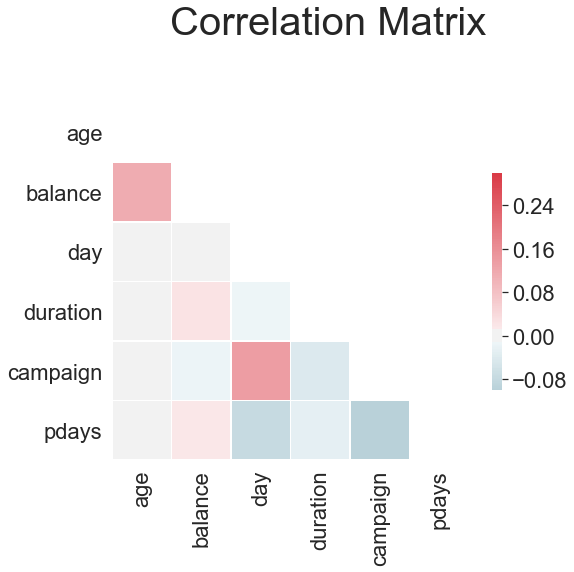

In [11]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Data preprocessing for model building

In [85]:
# changing deposit values(yes,no)t0 (1,0)
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})


In [86]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 14].values

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(X)

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,random_state=0)

# Model building- Segmenting customers into various clusters

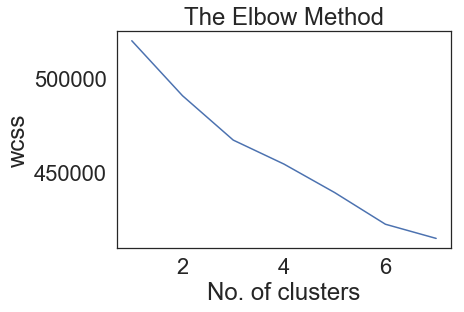

In [88]:
from sklearn.cluster import KMeans
# k=10
wcss=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=200, n_init=5, random_state=0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

In [89]:
# fitting k means with k=3
kmeans=KMeans(n_clusters=3)
y_means=kmeans.fit_predict(x_scaled)
clusterID=kmeans.labels_
clusterID

array([2, 2, 0, ..., 0, 1, 0])

In [90]:
df['cluster']=clusterID

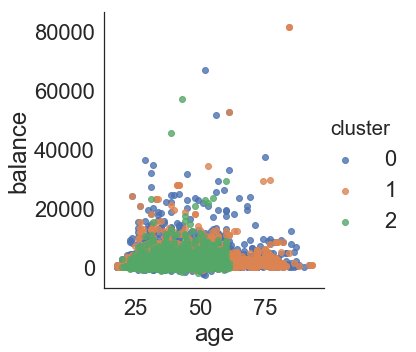

In [94]:
facet=sns.lmplot(data=df,x='age',y='balance',hue='cluster',fit_reg=False, legend=True,legend_out=True)

In [95]:
# fitting k means with k=6
kmeans=KMeans(n_clusters=6)
y_means=kmeans.fit_predict(x_scaled)
clusterID=kmeans.labels_
clusterID

array([1, 1, 2, ..., 2, 4, 5])

In [97]:
df['cluster']=clusterID

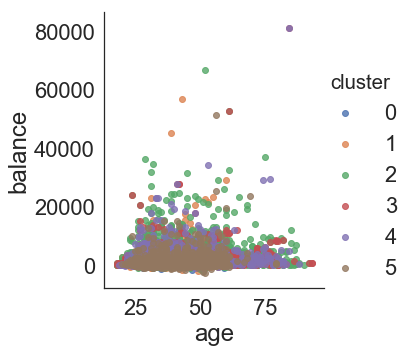

In [98]:
facet=sns.lmplot(data=df,x='age',y='balance',hue='cluster',fit_reg=False, legend=True,legend_out=True)

# Analysing deposit column

In [105]:
df1=pd.get_dummies(df)

In [106]:
X = df1.drop('deposit',axis=1)
y = df1.iloc[:, 6].values

In [107]:
X

,age,balance,day,duration,campaign,pdays,cluster,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,34,87,15,139,2,-1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,47,623,13,102,6,-1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,34,3119,16,306,1,-1,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,25,1857,12,187,1,91,3,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,50,11528,30,57,1,-1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,58,5092,11,199,6,-1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,32,62,13,45,1,-1,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,50,77,27,138,2,-1,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,58,879,16,242,7,-1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,33,370,11,145,4,-1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model building

In [119]:
from sklearn.linear_model import LogisticRegression 
lg = LogisticRegression(C=0.1)
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
sc.fit(X_train)
X_scaled=sc.transform(X_train)
X_test_s=sc.fit_transform(X_test)
lg.fit(X_scaled, y_train) 

print("Training set score: {:.3f}".format(lg.score(X_scaled, y_train))) 
print("Test set score: {:.3f}".format(lg.score(X_test_s, y_test)))

y_pred = lg.predict(X_test_s)

from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(" Confusion matrix \n:{}".format(confusion_matrix(y_test, y_pred)))
print("Accuracy :{}".format(accuracy_score(y_test, y_pred)))

Training set score: 0.817
Test set score: 0.807
 Confusion matrix 
:[[1083  210]
 [ 272  935]]
Accuracy :0.8072


# Confusion matrix

Test Data Accuracy: 0.8072


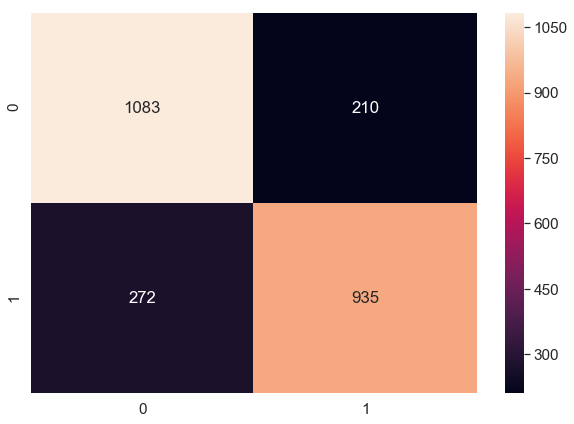

In [120]:
# Create a Comfusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

# Calculating scores

In [121]:
from sklearn.metrics import classification_report
print("Scores are \n:{}".format(classification_report(y_test, y_pred)))

Scores are 
:              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1293
           1       0.82      0.77      0.80      1207

   micro avg       0.81      0.81      0.81      2500
   macro avg       0.81      0.81      0.81      2500
weighted avg       0.81      0.81      0.81      2500



# Kfold cross validation

In [122]:
 # K-fold Cross validation to different subsets of the training tests
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lg, X= X_train, y = y_train, cv = 10)
print(accuracies)


[0.81890812 0.81333333 0.81733333 0.80666667 0.82133333 0.79066667
 0.80666667 0.816      0.828      0.81975968]


# Feature selection

In [123]:
from sklearn.feature_selection import SelectPercentile 
fs = SelectPercentile(percentile=50)
fs.fit(X_train,y_train)
X_train_fs = fs.transform(X_train)
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_fs.shape: {}".format(X_train_fs.shape))
X_test_fs = fs.transform(X_test)
lg.fit(X_train, y_train) 
print("Score with all features: {:.3f}".format(lg.score(X_test, y_test)))
lg.fit(X_train_fs, y_train) 
print("Score with only selected features: {:.3f}".format(lg.score(X_test_fs, y_test)))


X_train.shape: (7500, 47)
X_train_fs.shape: (7500, 23)
Score with all features: 0.812
Score with only selected features: 0.805


In [124]:
fs.get_support()

array([False,  True, False,  True,  True,  True,  True, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [128]:
selected_features= X_train.columns[(fs.get_support())]
print("Length of original features:{}".format(len(df1.columns)))
print("Length of selected features:{}".format(len(selected_features)))


Length of original features:48
Length of selected features:23


In [126]:
print(selected_features)

Index(['balance', 'duration', 'campaign', 'pdays', 'cluster',
       'job_blue-collar', 'job_retired', 'job_student', 'marital_married',
       'marital_single', 'education_tertiary', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'contact_cellular', 'contact_unknown',
       'month_apr', 'month_dec', 'month_mar', 'month_may', 'month_oct',
       'month_sep'],
      dtype='object')


# Conclusion

In [ ]:
# My result is different here. As we can see that selecting only important features reduces the test accuracy of the model.
